# Capstone2 project: International Student Recruitment Analytics
# Group 4
    - Rishikesh Gaikwad	                    Student ID 0812570
    - Fei Gao	                              Student ID 0822295
    - Ankitkumar Kamleshbhai Padhiar 	      Student ID 0803142
    - Abhigna Reddy Sudini	                 Student ID 0813526
---

# Part3 - Data pre-processing for ML model

### Import necessory libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import matplotlib.pyplot as plt#visualization
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6

### Read the dataset

In [2]:
st_raw = pd.read_excel('students_clean.xlsx')# read the original file

In [3]:
st = st_raw.copy() # make a copy
st.head() # data overview

,enrolled,applicant_number,mailing_address_postal_zip_code,primary_citizenship,mother_tongue,country_of_birth,date_of_birth,status_in_canada,current_country_of_residence,current_province_of_residence,...,withdraw_reason,revoke_reason,other_reason,decline_reason,decline_other_reason,deferral_offer_date,refund_offer_date,standardized_score,test_type_st,uid
0,False,X1981866,L7C 3B6,India,Panjabi; Punjabi,India,1996-12-20,Study Permit / Student Visa,Canada,Ontario,...,NaN,Payment Not Received,NaN,NaN,NaN,NaT,NaT,6.0,IELTS,1
1,True,X1981905,152123,India,Panjabi; Punjabi,India,2003-01-10,No status in Canada,India,Punjab,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,6.0,IELTS,2
2,False,X1965783,151504,India,Panjabi; Punjabi,India,1998-03-15,No status in Canada,India,Punjab,...,NaN,No Seats Available in the Selected Intake,NaN,NaN,NaN,NaT,NaT,6.5,IELTS,3
3,False,X1965785,143001,India,Panjabi; Punjabi,India,1999-01-27,No status in Canada,India,Punjab,...,NaN,Payment Not Received,NaN,NaN,NaN,NaT,NaT,6.0,IELTS,4
4,True,X1971268,143534,India,Panjabi; Punjabi,India,2004-06-04,No status in Canada,India,Punjab,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,6.5,IELTS,5


In [4]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33589 entries, 0 to 33588
Data columns (total 58 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   enrolled                                   33589 non-null  bool          
 1   applicant_number                           33589 non-null  object        
 2   mailing_address_postal_zip_code            31926 non-null  object        
 3   primary_citizenship                        33589 non-null  object        
 4   mother_tongue                              33589 non-null  object        
 5   country_of_birth                           33589 non-null  object        
 6   date_of_birth                              33589 non-null  datetime64[ns]
 7   status_in_canada                           33589 non-null  object        
 8   current_country_of_residence               33589 non-null  object        
 9   current_province_

## Feature Engineering - encoding catagorical features

Target variable- Converting Boolean to Numerical Values

In [5]:
st['enrolled'] = st['enrolled'].astype(int)

Delete 29 features

In [6]:
st = st.drop(["applicant_number", "overall_score", "declared_student_id", "profile_last_modified_date",
              "application_number", "program_selection_added_date", "program_title", "program_term",
              "program_start_date", "application_submitted_date", "application_resubmitted_date",
              "screened_date", "application_last_modified_date", "proof_of_payment_date",
              "offer_conditions", "offer_date", "issued_date", "expiration_date",
              "offer_accepted_date", "paid_date", "pre-registration_date", "withdraw_reason",
              "revoke_reason", "other_reason", "decline_reason", "decline_other_reason",
              "deferral_offer_date", "refund_offer_date", "uid"], axis=1)

### Frequency encoding

In [7]:
st['mailing_address_postal_zip_code'].nunique()

6442

In [8]:
st.mailing_address_postal_zip_code.fillna('Unknown', inplace=True)

In [9]:
st.mailing_address_postal_zip_code.isnull().sum()

0

In [10]:
# Calculate the frequency of each zip code
frequency = st['mailing_address_postal_zip_code'].value_counts()

# Map the frequencies to the zip_code column
st['zip_code_encoded'] = st['mailing_address_postal_zip_code'].map(frequency)

# Now 'st' contains an additional column 'zip_code_encoded' with frequency encoding

In [11]:
st = st.drop('mailing_address_postal_zip_code', axis=1)

### Binary Encoding - 8 features

In [12]:
st.test_type.fillna('Unknown', inplace=True)

In [13]:
st.agency_name.fillna('NoAgent', inplace=True)

In [14]:
print('primary_citizenship:',st.primary_citizenship.nunique())
print('mother_tongue:',st.mother_tongue.nunique())
print('country_of_birth:',st.country_of_birth.nunique())
print('current_country_of_residence:',st.current_country_of_residence.nunique())
print('current_province_of_residence:',st.current_province_of_residence.nunique())
print('agency_name:',st.agency_name.nunique())
print('program_code:',st.program_code.nunique())
print('test_type:',st.test_type.nunique())

primary_citizenship: 132
mother_tongue: 85
country_of_birth: 136
current_country_of_residence: 133
current_province_of_residence: 736
agency_name: 234
program_code: 121
test_type: 13


In [15]:
#!pip install category_encoders

In [16]:
import category_encoders as ce

# Create a binary encoder
encoder = ce.BinaryEncoder(cols=['primary_citizenship','mother_tongue','country_of_birth','current_country_of_residence',
                                'current_province_of_residence','agency_name','program_code','test_type'])

# Fit and transform to produce binary encoding
st_encoded = encoder.fit_transform(st[['primary_citizenship','mother_tongue','country_of_birth',
                                       'current_country_of_residence','current_province_of_residence',
                                       'agency_name','program_code','test_type']])

# Concatenate the original DataFrame with the encoded DataFrame
st = pd.concat([st, st_encoded], axis=1)

# Now 'st' contains the original data along with the binary encoded 'primary_citizenship' columns


In [17]:
st = st.drop(['primary_citizenship','mother_tongue','country_of_birth','current_country_of_residence',
                                'current_province_of_residence','agency_name','program_code','test_type'], axis=1)

Transform date of birth to age

In [18]:
from datetime import datetime
current_date = datetime.now()
#st['age'] = (current_date - st['date_of_birth']).astype('<m8[Y]')
st['age'] = (current_date - st['date_of_birth']).dt.days // 365

In [19]:
st = st.drop('date_of_birth', axis=1)

### one-hot encoding - 8 features

In [20]:
st['campus_name'] = st['campus_name'].replace(
                                                  {'One Riverside Dr':'Downtown campus',
                                                   'Media Plex':'Downtown campus',
                                                   'Windsor':'South Campus',
                                                    'St. Clair College Centre for the Arts':'Downtown campus',
                                                    'St. Clair College at Acumen Toronto':'Acumen Toronto campus',
                                                    'St. Clair College at Acumen Mississauga':'Acumen Mississauga campus',
                                                    'St. Clair College at Acumen Brampton':'Acumen Brampton campus'}
                                                   )

In [21]:
st.offer_state.isnull().sum()

2135

In [22]:
st.offer_state.unique()

array(['Revoked', 'Pre-Registered', 'Refund Requested',
       'Deferral Requested', 'Accepted', 'Withdrawn', 'Declined',
       'Offered', nan, 'Paid'], dtype=object)

In [23]:
#st.offer_state.fillna('Unknown', inplace=True) # no need to fill out null when using one-hot encoding

In [24]:
print('status_in_canada:',st.status_in_canada.nunique())
print('english_proficiency_type:',st.english_proficiency_type.nunique())
print('applicant_type:',st.applicant_type.nunique())
print('application_state:',st.application_state.nunique())
print('campus_name:',st.campus_name.nunique())
print('screening_status:',st.screening_status.nunique())
print('offer_state:',st.offer_state.nunique())
print('program_decision_state:',st.program_decision_state.nunique())

status_in_canada: 5
english_proficiency_type: 6
applicant_type: 3
application_state: 4
campus_name: 6
screening_status: 3
offer_state: 9
program_decision_state: 4


In [25]:
#column replaced by its one-hot encoded columns
st = pd.get_dummies(st, columns=[
    'status_in_canada',
    'english_proficiency_type',
    'applicant_type',
    'application_state',
    'campus_name',
    'screening_status',
    'offer_state',
    'program_decision_state'
])

In [26]:
st.head()

,enrolled,program_choice_rank,supporting_document_visitor_visa,supporting_document_approval_in_principle,supporting_document_co_op_work_permit,supporting_document_study_permit,supporting_document_visa_approval_letter,conditions?,proof_of_payment_provided,standardized_score,...,offer_state_Offered,offer_state_Paid,offer_state_Pre-Registered,offer_state_Refund Requested,offer_state_Revoked,offer_state_Withdrawn,program_decision_state_Declined,program_decision_state_No Decision,program_decision_state_Offered,program_decision_state_Waitlisted
0,0,1,0,0,0,2,0,0.0,False,6.0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0,2,0,0.0,False,6.0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0.0,True,6.5,...,0,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,0.0,False,6.0,...,0,0,0,0,1,0,0,0,1,0
4,1,1,0,0,0,2,0,0.0,True,6.5,...,0,0,1,0,0,0,0,0,1,0


In [27]:
st['conditions?'].fillna(99, inplace=True)

In [28]:
st['conditions?'] = st['conditions?'].astype(int)

In [29]:
st['proof_of_payment_provided'] = st['proof_of_payment_provided'].astype(int)

# Now, 'proof_of_payment_provided' column will have values 1 for True and 0 for False


In [30]:
# Convert 'IELTS' to 1
st['test_type_st'] = (st['test_type_st'] == 'IELTS').astype(int)

# Now, 'test_type_st' column will have values 1 for 'IELTS' and 0 for missing values


In [31]:
st.standardized_score.fillna(0, inplace=True)

In [32]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33589 entries, 0 to 33588
Columns: 113 entries, enrolled to program_decision_state_Waitlisted
dtypes: float64(1), int32(4), int64(68), uint8(40)
memory usage: 19.5 MB


In [33]:
# Adjust display settings to show more rows or columns as needed
#pd.set_option('display.max_rows', None)  # This will allow displaying all rows.
#pd.set_option('display.max_columns', None)  # This will allow displaying all columns.

# Now, when you run st.isnull().sum(), it will display the null count for all columns
#print(st.isnull().sum())


In [ ]:
st.to_excel('students_numerical.xlsx', index=False)

In [ ]:
st_num = pd.read_excel('students_numerical.xlsx')

In [ ]:
st_num.head()

---

## Normalization of Data

### Using MinMaxScaler for Normalization
1. Min-Max Scaling
Min-Max Scaling scales the data to a fixed range, usually 0 to 1.
2. Standardization (Z-score normalization)
This method scales the data so that it has a mean of 0 and a standard deviation of 1.

#### Choosing Between Min-Max Scaling and Standardization
1.Min-Max Scaling is useful when you need values in a bounded interval. However, it's sensitive to outliers.  
2.Standardization is less affected by outliers and is suitable when you don't have a specific range for your data. It's more common in machine learning, especially for algorithms like Support Vector Machines and Principal Component Analysis.

In [35]:
from sklearn.preprocessing import MinMaxScaler

# Assuming `st` is your dataframe and 'enrolled' is the target feature
#features = st_new.drop('enrolled', axis=1)  # Extracting the features
#target = st_new['enrolled']  # Extracting the target variable

scaler = MinMaxScaler(feature_range=(0, 1))
features_normalized = scaler.fit_transform(st)

# Now, `features_normalized` contains the normalized features

In [36]:
#convert this back into a DataFrame
features_normalized_df = pd.DataFrame(features_normalized, columns=st.columns)

-----

### Save the numerical dataframe as a xlsx file

In [37]:
features_normalized_df.to_excel('students_num_normalized.xlsx', index=False)

In [2]:
st_normal = pd.read_excel('students_num_normalized.xlsx')

In [39]:
st_normal.head()

,enrolled,program_choice_rank,supporting_document_visitor_visa,supporting_document_approval_in_principle,supporting_document_co_op_work_permit,supporting_document_study_permit,supporting_document_visa_approval_letter,conditions?,proof_of_payment_provided,standardized_score,...,offer_state_Offered,offer_state_Paid,offer_state_Pre-Registered,offer_state_Refund Requested,offer_state_Revoked,offer_state_Withdrawn,program_decision_state_Declined,program_decision_state_No Decision,program_decision_state_Offered,program_decision_state_Waitlisted
0,0,1,0.0,0.0,0.0,0.25,0.0,0.0,0,0.666667,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0.0,0.0,0.0,0.25,0.0,0.0,0,0.666667,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0.0,0.0,0.0,0.00,0.0,0.0,1,0.722222,...,0,0,0,0,1,0,0,0,1,0
3,0,1,0.0,0.0,0.0,0.00,0.0,0.0,0,0.666667,...,0,0,0,0,1,0,0,0,1,0
4,1,1,0.0,0.0,0.0,0.25,0.0,0.0,1,0.722222,...,0,0,1,0,0,0,0,0,1,0


## Data profiling - feature correlation

In [65]:
#st_normal.describe().T

In [66]:
#correlation_matrix = st_normal.corr().round(2)
#correlation_matrix

In [67]:
#fig, ax = plt.subplots(figsize=(12,10))         # Sample figsize in inches
#sns.heatmap(correlation_matrix, annot=True, linewidths=.5, ax=ax)

--------

#  Part4 - Implimenting Basic Machine Learning Model

## Create and evaluate an initial model

## Logistic Regression

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
X = st_normal.drop('enrolled', axis=1)  # Input features
y = st_normal['enrolled']  # Target variable

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Initialize the Logistic Regression model
lr_model = LogisticRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

C:\Users\genie\anaconda3\envs\DAB200\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.9269127716582316
Confusion Matrix:
 [[4273  116]
 [ 375 1954]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      4389
           1       0.94      0.84      0.89      2329

    accuracy                           0.93      6718
   macro avg       0.93      0.91      0.92      6718
weighted avg       0.93      0.93      0.93      6718



## Decision Trees

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [47]:
# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Accuracy Score (Decision Tree):", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))


Accuracy Score (Decision Tree): 0.9135159273593332
Confusion Matrix (Decision Tree):
 [[4089  300]
 [ 281 2048]]
Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      4389
           1       0.87      0.88      0.88      2329

    accuracy                           0.91      6718
   macro avg       0.90      0.91      0.90      6718
weighted avg       0.91      0.91      0.91      6718



## Random Forests

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy Score (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))


Accuracy Score (Random Forest): 0.9441798154212563
Confusion Matrix (Random Forest):
 [[4290   99]
 [ 276 2053]]
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      4389
           1       0.95      0.88      0.92      2329

    accuracy                           0.94      6718
   macro avg       0.95      0.93      0.94      6718
weighted avg       0.94      0.94      0.94      6718



## Gradient Boosting Machines (GBM)

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [53]:
# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Accuracy Score (Gradient Boosting):", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix (Gradient Boosting):\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report (Gradient Boosting):\n", classification_report(y_test, y_pred_gb))


Accuracy Score (Gradient Boosting): 0.9413515927359333
Confusion Matrix (Gradient Boosting):
 [[4279  110]
 [ 284 2045]]
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      4389
           1       0.95      0.88      0.91      2329

    accuracy                           0.94      6718
   macro avg       0.94      0.93      0.93      6718
weighted avg       0.94      0.94      0.94      6718



## XGBoost

In [54]:
#pip install xgboost

In [55]:
import xgboost as xgb

# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [56]:
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("Accuracy Score (XGBoost):", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix (XGBoost):\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))


Accuracy Score (XGBoost): 0.9474545995832093
Confusion Matrix (XGBoost):
 [[4265  124]
 [ 229 2100]]
Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      4389
           1       0.94      0.90      0.92      2329

    accuracy                           0.95      6718
   macro avg       0.95      0.94      0.94      6718
weighted avg       0.95      0.95      0.95      6718



## Support Vector Machines (SVM)

In [57]:
from sklearn.svm import SVC

In [58]:
# Initialize the SVM Classifier with a specific kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='auto', random_state=42)

# Fit the model to the training data
svm_model.fit(X_train, y_train)

SVC(gamma='auto', random_state=42)

In [59]:
# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy Score (SVM):", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix (SVM):\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report (SVM):\n", classification_report(y_test, y_pred_svm))


Accuracy Score (SVM): 0.8978862756772849
Confusion Matrix (SVM):
 [[4281  108]
 [ 578 1751]]
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      4389
           1       0.94      0.75      0.84      2329

    accuracy                           0.90      6718
   macro avg       0.91      0.86      0.88      6718
weighted avg       0.90      0.90      0.89      6718



## Neural Networks

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [61]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10


C:\Users\genie\anaconda3\envs\DAB200\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


672/672 [==============================] - 2s 2ms/step - loss: 0.2417 - accuracy: 0.9023 - val_loss: 0.2085 - val_accuracy: 0.9139
Epoch 2/10
672/672 [==============================] - 1s 2ms/step - loss: 0.1850 - accuracy: 0.9292 - val_loss: 0.1790 - val_accuracy: 0.9304
Epoch 3/10
672/672 [==============================] - 1s 2ms/step - loss: 0.1700 - accuracy: 0.9350 - val_loss: 0.1805 - val_accuracy: 0.9289
Epoch 4/10
672/672 [==============================] - 1s 2ms/step - loss: 0.1580 - accuracy: 0.9413 - val_loss: 0.1711 - val_accuracy: 0.9366
Epoch 5/10
672/672 [==============================] - 1s 2ms/step - loss: 0.1489 - accuracy: 0.9440 - val_loss: 0.1670 - val_accuracy: 0.9340
Epoch 6/10
672/672 [==============================] - 1s 2ms/step - loss: 0.1408 - accuracy: 0.9465 - val_loss: 0.1700 - val_accuracy: 0.9299
Epoch 7/10
672/672 [==============================] - 1s 2ms/step - loss: 0.1351 - accuracy: 0.9490 - val_loss: 0.1619 - val_accuracy: 0.9367
Epoch 8/10
672/67

In [62]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)


210/210 [==============================] - 0s 2ms/step - loss: 0.1722 - accuracy: 0.9414
Test accuracy: 0.941351592540741


In [63]:
# Make predictions
predictions = model.predict(X_test)

210/210 [==============================] - 0s 1ms/step


---

In [64]:
#!pip install lazypredict

In [65]:
import lazypredict

In [66]:
from lazypredict.Supervised import LazyClassifier

In [67]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [04:43<00:00,  9.78s/it]

[LightGBM] [Info] Number of positive: 9489, number of negative: 17382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 503
[LightGBM] [Info] Number of data points in the train set: 26871, number of used features: 106
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353132 -> initscore=-0.605302
[LightGBM] [Info] Start training from score -0.605302


In [68]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.95,0.94,0.94,0.95,0.49
LGBMClassifier,0.95,0.93,0.93,0.95,0.67
RandomForestClassifier,0.94,0.93,0.93,0.94,2.83
BaggingClassifier,0.94,0.93,0.93,0.94,1.89
ExtraTreesClassifier,0.94,0.92,0.92,0.94,3.36
SVC,0.93,0.91,0.91,0.93,32.23
CalibratedClassifierCV,0.93,0.91,0.91,0.93,33.96
LogisticRegression,0.93,0.91,0.91,0.93,0.31
LinearSVC,0.93,0.91,0.91,0.93,9.14


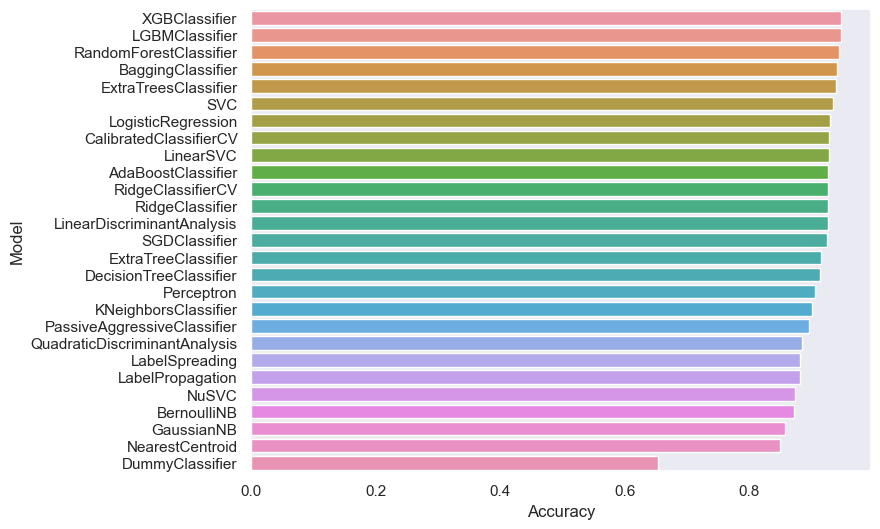

In [69]:
models_sorted = models.sort_values('Accuracy', ascending=False)
sns.set_theme(style="dark")
al = sns.barplot(y=models_sorted.index, x="Accuracy", data=models_sorted)

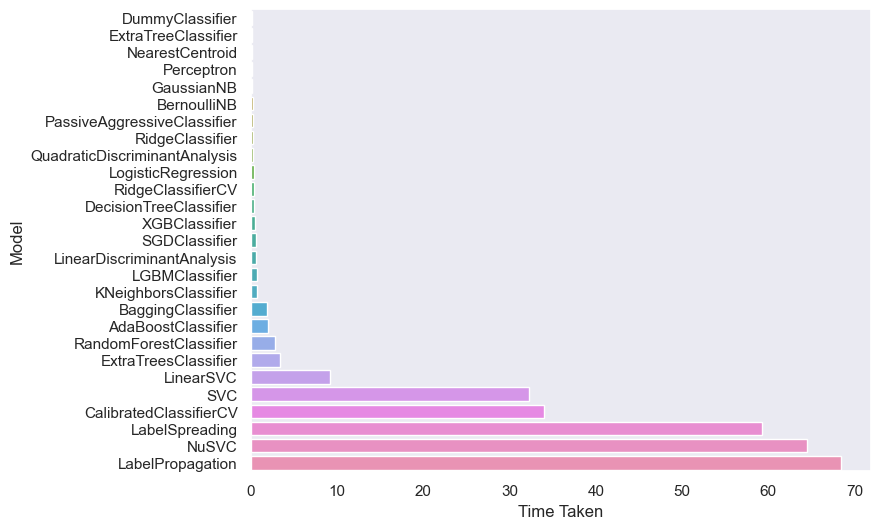

In [70]:
models_sorted_time = models.sort_values('Time Taken', ascending=True)
sns.set_theme(style="dark")
al = sns.barplot(y=models_sorted_time.index, x="Time Taken", data=models_sorted_time)

In [71]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.95,0.94,0.94,0.95,0.49
LGBMClassifier,0.95,0.93,0.93,0.95,0.67
RandomForestClassifier,0.94,0.93,0.93,0.94,2.83
BaggingClassifier,0.94,0.93,0.93,0.94,1.89
ExtraTreesClassifier,0.94,0.92,0.92,0.94,3.36
SVC,0.93,0.91,0.91,0.93,32.23
CalibratedClassifierCV,0.93,0.91,0.91,0.93,33.96
LogisticRegression,0.93,0.91,0.91,0.93,0.31
LinearSVC,0.93,0.91,0.91,0.93,9.14


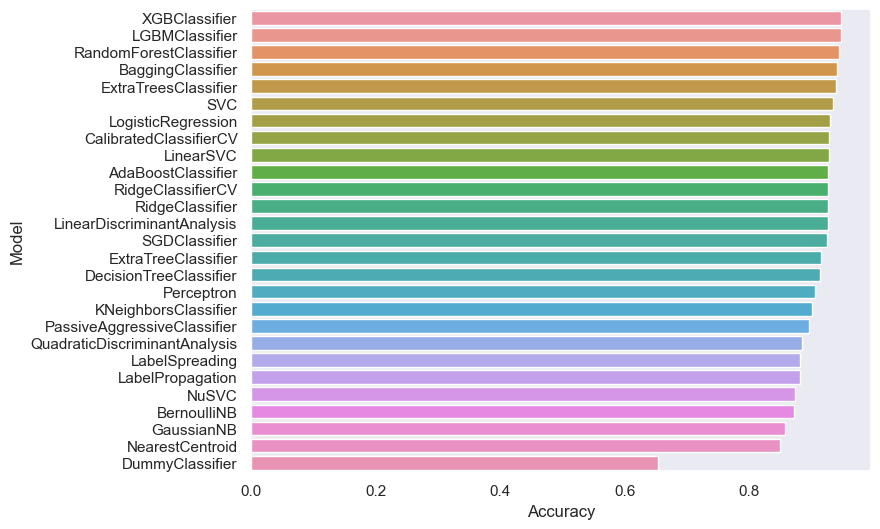

In [72]:
predictions_sorted = predictions.sort_values('Accuracy', ascending=False)
sns.set_theme(style="dark")
al = sns.barplot(y=predictions_sorted.index, x="Accuracy", data=predictions_sorted)

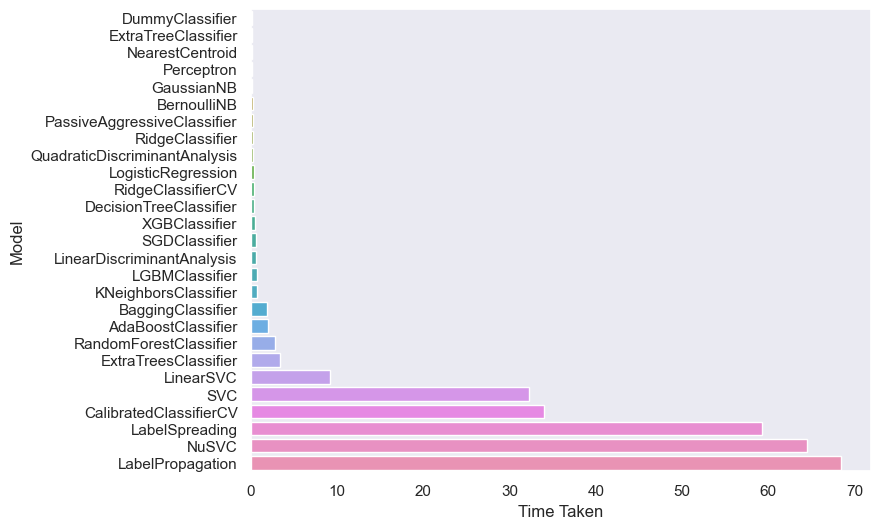

In [73]:
predictions_sorted_time = predictions.sort_values('Time Taken', ascending=True)
sns.set_theme(style="dark")
al = sns.barplot(y=predictions_sorted_time.index, x="Time Taken", data=predictions_sorted_time)

# Part 5 Featrue selection

Selecting features from a dataframe with a large number of features is crucial for building efficient and effective machine learning models. There are several strategies you can use to select features, ranging from statistical methods to machine learning-based approaches. The goal is to reduce the feature space to a manageable size while retaining the most informative features for your model. Here are some common methods for feature selection:

### 1. Filter Methods
Filter methods evaluate the relevance of the features based on statistical measures and select those that have the strongest relationships with the output variable. They are usually fast and effective at removing irrelevant features. Common techniques include:
- **Correlation matrix**: Use Pearson correlation to see the linear relationship between features and the target variable. Remove features with very low correlation to the target.
- **Chi-square test**: Used for categorical features to determine the dependency between variables.
- **ANOVA F-test**: Can be used when features are numeric and the target is categorical, to see if there are significant differences between groups.

### 2. Wrapper Methods
Wrapper methods consider the selection of a set of features as a search problem, where different combinations are prepared, evaluated, and compared to other combinations. They are computationally expensive but often provide the best performing feature set for your specific model.
- **Recursive Feature Elimination (RFE)**: Recursively removes attributes and builds a model on those attributes that remain to identify which variables contribute the most to predicting the target variable.
- **Sequential Feature Selection**: Sequentially adds or removes features until an optimal feature subset is found.

### 3. Embedded Methods
Embedded methods perform feature selection as part of the model construction process. These methods combine the qualities of filter and wrapper methods, being more efficient than wrapper methods while often being more effective than filter methods.
- **Lasso (L1 Regularization)**: Adds a penalty on the absolute size of the coefficients, which can shrink some coefficients to zero, effectively performing feature selection.
- **Ridge (L2 Regularization)**: Adds a penalty on the square size of the coefficients, but does not necessarily eliminate them, hence not directly a feature selection method but can help in reducing model complexity.
- **Decision Trees / Random Forests**: These models can provide feature importances which can be used to select the most important features.

### 4. Dimensionality Reduction
Sometimes, instead of selecting individual features, reducing the dimensionality of the data can be more effective.
- **Principal Component Analysis (PCA)**: Transforms the data into a new set of variables, the principal components, which are linear combinations of the original features with the greatest variance.
- **Linear Discriminant Analysis (LDA)**: Used as a dimensionality reduction technique in the pre-processing step for pattern-classification and machine learning applications.

### How to Proceed
- **Start with Exploratory Data Analysis (EDA)**: Understand the data, check for correlations, and identify obvious redundant features.
- **Use Filter Methods**: For a quick and dirty analysis to remove irrelevant features.
- **Try Embedded and Wrapper Methods**: For more refined feature selection, especially when computational resources and time allow.
- **Cross-Validation**: Always use cross-validation to evaluate the performance of your model with the selected features to ensure that your feature selection process is improving your model's performance.

Feature selection can significantly impact the performance of your machine learning models, so it's worth spending time to do it right. Depending on your specific dataset and problem, some methods might be more suitable than others.

## 5.1 Feature Selection using Chi Square

In [74]:
from sklearn.feature_selection import chi2

In [75]:
chi_scores = chi2(X, y)

In [76]:
chi_scores

(array([8.31803978e+01, 1.52024853e+01, 3.36673987e+01, 3.65625336e+00,
        2.39070141e+03, 7.07720354e+02, 4.97279805e+02, 2.85996526e+03,
        2.99645139e+01, 4.65919822e+01, 3.29722220e+01, 1.35020755e+00,
        8.56528262e-01, 4.93859576e+00, 3.48498870e+01, 4.71094553e+00,
        3.10821092e+01, 1.64376003e+02, 3.11373708e+00, 4.65500314e-01,
        2.69004951e+01, 4.16600516e+00, 6.00869896e+01, 1.73467161e+02,
        2.95899278e+02, 6.44117837e+01, 3.01906385e-01, 2.66102892e-02,
        1.12404200e+01, 2.98927813e+01, 8.85762353e+00, 2.98032467e+01,
        1.35640880e+02, 1.23445678e+00, 1.88142648e-02, 3.94057355e+01,
        1.47938437e+01, 8.24331622e+01, 1.27949035e+01, 6.35172545e+02,
        4.83386490e-02, 5.32356674e+00, 1.94795029e+00, 4.68719093e+01,
        6.74744131e+01, 1.52080550e+02, 1.31945973e+02, 2.81724560e+02,
        2.46561887e+02, 2.27275188e+02, 4.14733529e+00, 5.15982614e+01,
        5.68132247e-01, 1.27893134e+00, 1.16893665e-01, 1.160802

<AxesSubplot: >

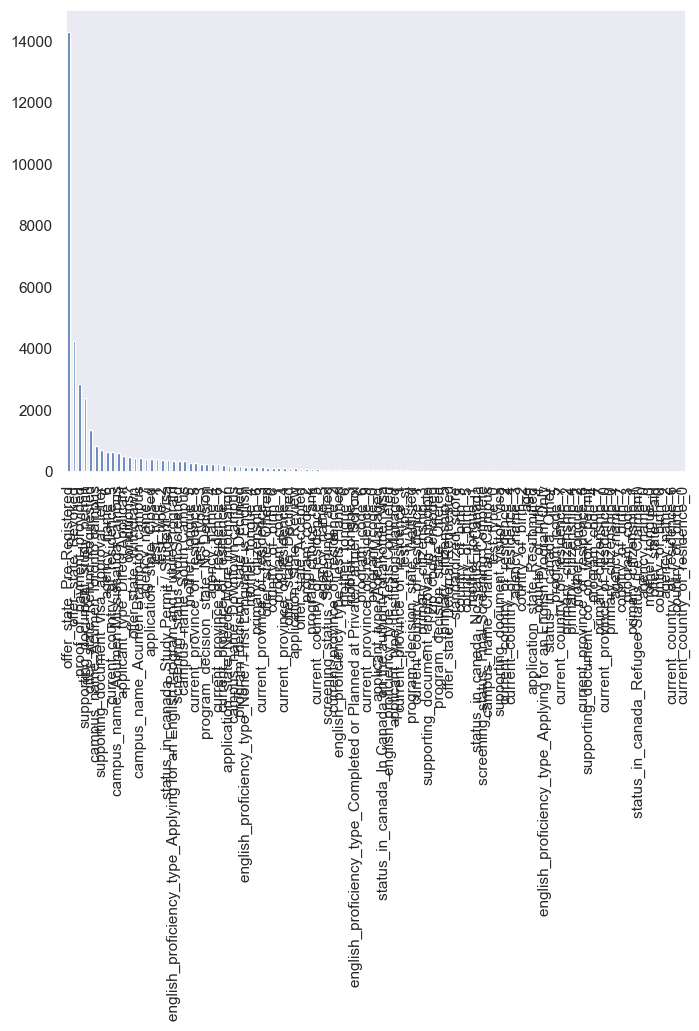

In [77]:
#Higher the Chi Value better the importance.
chi_values = pd.Series(chi_scores[0], index= X.columns)
chi_values.sort_values(ascending=False, inplace = True)
chi_values.plot.bar()

<AxesSubplot: >

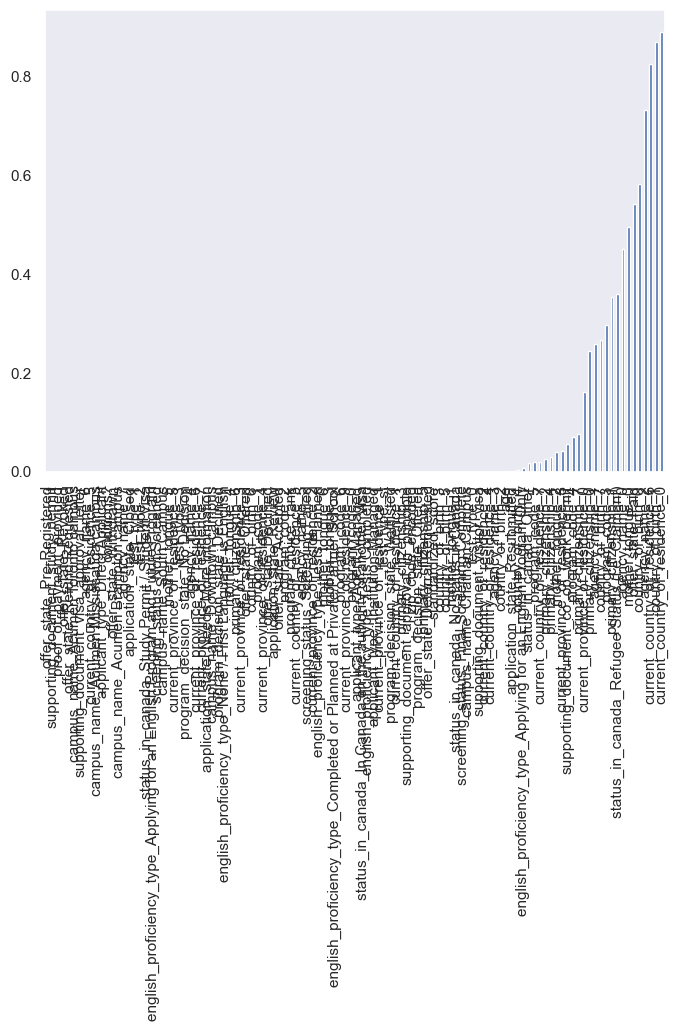

In [78]:
#lower the p Value < 0.05 better the importance.
p_values = pd.Series(chi_scores[1], index= X.columns)
p_values.sort_values(ascending=True, inplace = True)
p_values.plot.bar()

In [79]:
#Selecting features with less than 0.05 p value.

significant_features = p_values[p_values < 0.05]
significant_feature_names = significant_features.index
print(significant_features)
print(significant_feature_names)

offer_state_Pre-Registered         0.00
supporting_document_study_permit   0.00
proof_of_payment_provided          0.00
offer_state_Revoked                0.00
offer_state_Refund Requested       0.00
                                   ... 
current_country_of_residence_7     0.02
primary_citizenship_2              0.03
primary_citizenship_4              0.03
mother_tongue_2                    0.04
current_province_of_residence_8    0.04
Length: 94, dtype: float64
Index(['offer_state_Pre-Registered', 'supporting_document_study_permit',
       'proof_of_payment_provided', 'offer_state_Revoked',
       'offer_state_Refund Requested', 'campus_name_Acumen Toronto campus',
       'supporting_document_visa_approval_letter', 'agency_name_6',
       'current_country_of_residence_5',
       'campus_name_Acumen Mississauga campus',
       'applicant_type_Direct Applicant', 'conditions?',
       'offer_state_Withdrawn', 'campus_name_Acumen Brampton campus',
       'agency_name_7', 'application_stat

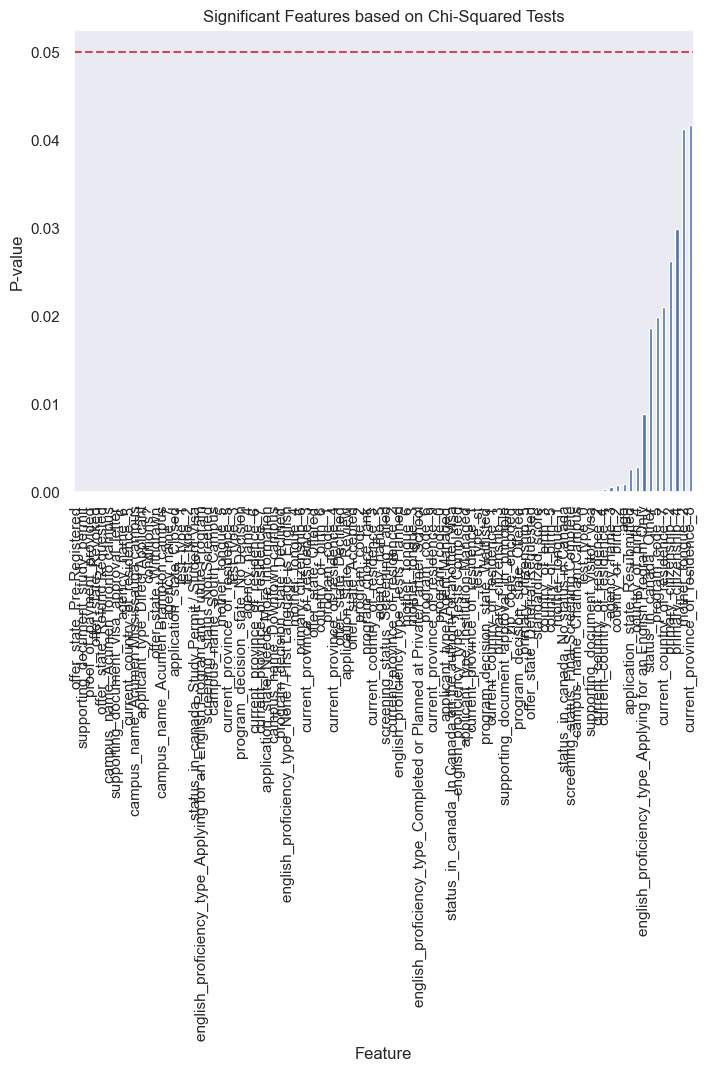

In [80]:
plt.figure(figsize=(8,6))  # You can adjust the figure size as needed
significant_features.plot.bar()
plt.title('Significant Features based on Chi-Squared Tests')
plt.xlabel('Feature')
plt.ylabel('P-value')
plt.axhline(y=0.05, color='r', linestyle='--')  # Adds a threshold line at p-value = 0.05
plt.show()

In [81]:
#Selecting the Significant Features

significant_features_df = X[significant_feature_names]

In [82]:
#assigned X2 featuers
X1 = significant_features_df

X1

,offer_state_Pre-Registered,supporting_document_study_permit,proof_of_payment_provided,offer_state_Revoked,offer_state_Refund Requested,campus_name_Acumen Toronto campus,supporting_document_visa_approval_letter,agency_name_6,current_country_of_residence_5,campus_name_Acumen Mississauga campus,...,application_state_Resubmitted,country_of_birth_4,english_proficiency_type_Applying for an English Program Only,status_in_canada_Other,program_code_5,current_country_of_residence_7,primary_citizenship_2,primary_citizenship_4,mother_tongue_2,current_province_of_residence_8
0,0,0.25,0,1,0,1,0.00,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0.25,0,0,0,1,0.00,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0.00,1,1,0,0,0.00,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0.00,0,1,0,0,0.00,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0.25,1,0,0,0,0.00,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33584,0,0.00,0,0,0,0,0.00,1,1,0,...,0,0,0,0,1,0,0,0,0,0
33585,0,0.00,1,0,1,0,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33586,1,0.25,1,0,0,0,0.00,0,0,1,...,0,0,0,0,1,0,0,0,0,1
33587,0,0.25,0,1,0,0,0.00,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [84]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [04:16<00:00,  4.38s/it]

[LightGBM] [Info] Number of positive: 9489, number of negative: 17382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 26871, number of used features: 92
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353132 -> initscore=-0.605302
[LightGBM] [Info] Start training from score -0.605302


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [04:16<00:00,  8.85s/it]


In [85]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.95,0.93,0.93,0.95,0.41
LGBMClassifier,0.95,0.93,0.93,0.95,0.39
RandomForestClassifier,0.95,0.93,0.93,0.95,2.59
BaggingClassifier,0.94,0.93,0.93,0.94,1.67
ExtraTreesClassifier,0.94,0.92,0.92,0.94,3.19
SVC,0.94,0.92,0.92,0.94,28.74
LogisticRegression,0.93,0.91,0.91,0.93,0.38
LinearSVC,0.93,0.91,0.91,0.93,8.82
CalibratedClassifierCV,0.93,0.91,0.91,0.93,29.22


## 5.2 Feature Selection using desicion tree

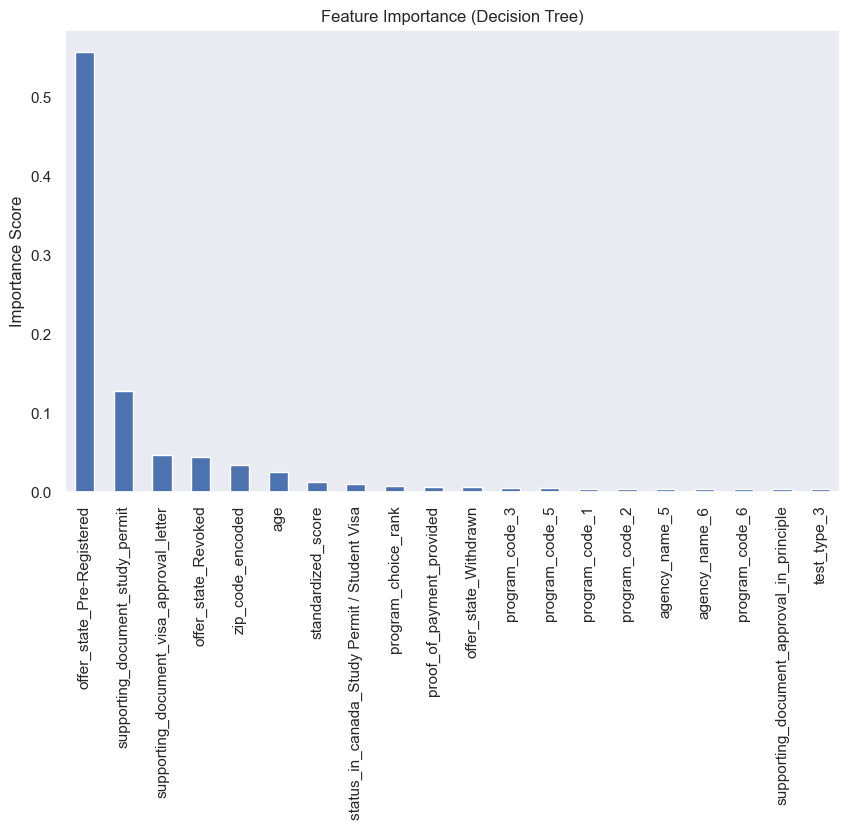

In [86]:
# Assuming your Decision Tree model is named dt_model
feature_importances_dt = pd.Series(dt_model.feature_importances_, index=X.columns)

# Sorting the features by importance
feature_importances_dt = feature_importances_dt.sort_values(ascending=False)

# Plotting
feature_importances_dt[0:20].plot(kind='bar', figsize=(10,6))
plt.title('Feature Importance (Decision Tree)')
plt.ylabel('Importance Score')
plt.show()


In [87]:
#Assigning top 10 features to the X3

top_10_features = feature_importances_dt.head(10).index
X2 = X[top_10_features]

X2

,offer_state_Pre-Registered,supporting_document_study_permit,supporting_document_visa_approval_letter,offer_state_Revoked,zip_code_encoded,age,standardized_score,status_in_canada_Study Permit / Student Visa,program_choice_rank,proof_of_payment_provided
0,0,0.25,0.00,1,0.00,0.29,0.67,1,1,0
1,1,0.25,0.00,0,0.08,0.18,0.67,0,0,0
2,0,0.00,0.00,1,0.02,0.25,0.72,0,0,1
3,0,0.00,0.00,1,0.29,0.25,0.67,0,1,0
4,1,0.25,0.00,0,0.02,0.14,0.72,0,1,1
...,...,...,...,...,...,...,...,...,...,...
33584,0,0.00,0.00,0,0.00,0.32,0.67,0,1,0
33585,0,0.00,0.00,0,0.03,0.20,0.67,0,1,1
33586,1,0.25,0.00,0,0.05,0.20,0.72,0,1,1
33587,0,0.25,0.00,1,0.00,0.34,0.72,0,1,0


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [89]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [02:45<00:00,  5.71s/it]

[LightGBM] [Info] Number of positive: 9489, number of negative: 17382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 26871, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353132 -> initscore=-0.605302
[LightGBM] [Info] Start training from score -0.605302


In [90]:
#Testing

predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.93,0.92,0.92,0.93,0.17
SVC,0.93,0.92,0.92,0.93,8.10
XGBClassifier,0.93,0.92,0.92,0.93,0.28
RandomForestClassifier,0.93,0.91,0.91,0.93,1.73
KNeighborsClassifier,0.93,0.91,0.91,0.93,0.42
LabelSpreading,0.93,0.91,0.91,0.93,87.75
LabelPropagation,0.93,0.91,0.91,0.93,30.37
ExtraTreesClassifier,0.92,0.91,0.91,0.92,1.51
BaggingClassifier,0.92,0.91,0.91,0.92,0.33


## 5.3 Feature Selection using random forest

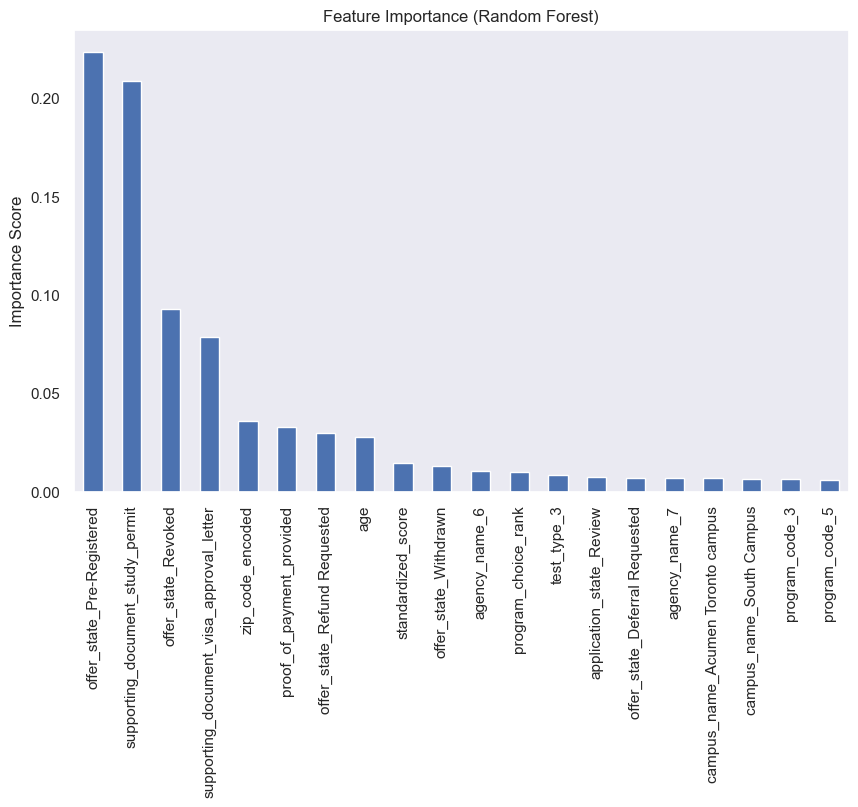

In [91]:
# Assuming your Random Forest model is named rf_model
feature_importances_rf = pd.Series(rf_model.feature_importances_, index=X.columns)

# Sorting the features by importance
feature_importances_rf = feature_importances_rf.sort_values(ascending=False)

# Plotting
feature_importances_rf[0:20].plot(kind='bar', figsize=(10,6))
plt.title('Feature Importance (Random Forest)')
plt.ylabel('Importance Score')
plt.show()


In [92]:
top_10_features = feature_importances_rf.head(10).index
top_10_features

Index(['offer_state_Pre-Registered', 'supporting_document_study_permit',
       'offer_state_Revoked', 'supporting_document_visa_approval_letter',
       'zip_code_encoded', 'proof_of_payment_provided',
       'offer_state_Refund Requested', 'age', 'standardized_score',
       'offer_state_Withdrawn'],
      dtype='object')

In [93]:
X3 = X[top_10_features]
X3

,offer_state_Pre-Registered,supporting_document_study_permit,offer_state_Revoked,supporting_document_visa_approval_letter,zip_code_encoded,proof_of_payment_provided,offer_state_Refund Requested,age,standardized_score,offer_state_Withdrawn
0,0,0.25,1,0.00,0.00,0,0,0.29,0.67,0
1,1,0.25,0,0.00,0.08,0,0,0.18,0.67,0
2,0,0.00,1,0.00,0.02,1,0,0.25,0.72,0
3,0,0.00,1,0.00,0.29,0,0,0.25,0.67,0
4,1,0.25,0,0.00,0.02,1,0,0.14,0.72,0
...,...,...,...,...,...,...,...,...,...,...
33584,0,0.00,0,0.00,0.00,0,0,0.32,0.67,0
33585,0,0.00,0,0.00,0.03,1,1,0.20,0.67,0
33586,1,0.25,0,0.00,0.05,1,0,0.20,0.72,0
33587,0,0.25,1,0.00,0.00,0,0,0.34,0.72,0


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42)

In [95]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [02:41<00:02,  2.96s/it]

[LightGBM] [Info] Number of positive: 9489, number of negative: 17382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 26871, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353132 -> initscore=-0.605302
[LightGBM] [Info] Start training from score -0.605302


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [02:42<00:00,  5.59s/it]


In [96]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.94,0.92,0.92,0.94,0.32
XGBClassifier,0.93,0.92,0.92,0.93,0.30
SVC,0.93,0.92,0.92,0.93,8.46
RandomForestClassifier,0.93,0.91,0.91,0.93,1.78
KNeighborsClassifier,0.93,0.91,0.91,0.92,0.41
LabelSpreading,0.92,0.91,0.91,0.92,84.12
LabelPropagation,0.92,0.91,0.91,0.92,29.23
BaggingClassifier,0.92,0.90,0.90,0.92,0.33
ExtraTreesClassifier,0.92,0.90,0.90,0.92,1.54


## 5.4 Feature selection using random forest top 10 features with its subsets

In [4]:
top_15_features = ['supporting_document_study_permit', 
'offer_state_Pre-Registered',
'offer_state_Revoked', 
'offer_state_Refund Requested',
'offer_state_Withdrawn',
'offer_state_Deferral Requested',
'offer_state_Paid',
'offer_state_Accepted',
'offer_state_Declined',
'offer_state_Offered',
'supporting_document_visa_approval_letter',
'zip_code_encoded', 
'proof_of_payment_provided', 
'age',
'standardized_score']

In [7]:
st_selected = st_normal[[   'enrolled',
                            'supporting_document_study_permit', 
                            'offer_state_Pre-Registered',
                            'offer_state_Revoked', 
                            'offer_state_Refund Requested',
                            'offer_state_Withdrawn',
                            'offer_state_Deferral Requested',
                            'offer_state_Paid',
                            'offer_state_Accepted',
                            'offer_state_Declined',
                            'offer_state_Offered',
                            'supporting_document_visa_approval_letter',
                            'zip_code_encoded', 
                            'proof_of_payment_provided', 
                            'age',
                            'standardized_score']]

In [8]:
st_selected.to_excel('students_selected.xlsx', index=False)

In [98]:
X4 = X[top_15_features]
X4

,supporting_document_study_permit,offer_state_Pre-Registered,offer_state_Revoked,offer_state_Refund Requested,offer_state_Withdrawn,offer_state_Deferral Requested,offer_state_Paid,offer_state_Accepted,offer_state_Declined,offer_state_Offered,supporting_document_visa_approval_letter,zip_code_encoded,proof_of_payment_provided,age,standardized_score
0,0.25,0,1,0,0,0,0,0,0,0,0.00,0.00,0,0.29,0.67
1,0.25,1,0,0,0,0,0,0,0,0,0.00,0.08,0,0.18,0.67
2,0.00,0,1,0,0,0,0,0,0,0,0.00,0.02,1,0.25,0.72
3,0.00,0,1,0,0,0,0,0,0,0,0.00,0.29,0,0.25,0.67
4,0.25,1,0,0,0,0,0,0,0,0,0.00,0.02,1,0.14,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33584,0.00,0,0,0,0,0,0,0,1,0,0.00,0.00,0,0.32,0.67
33585,0.00,0,0,1,0,0,0,0,0,0,0.00,0.03,1,0.20,0.67
33586,0.25,1,0,0,0,0,0,0,0,0,0.00,0.05,1,0.20,0.72
33587,0.25,0,1,0,0,0,0,0,0,0,0.00,0.00,0,0.34,0.72


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.2, random_state=42)

In [100]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [02:37<00:00,  5.43s/it]


[LightGBM] [Info] Number of positive: 9489, number of negative: 17382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 218
[LightGBM] [Info] Number of data points in the train set: 26871, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353132 -> initscore=-0.605302
[LightGBM] [Info] Start training from score -0.605302


In [101]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.94,0.92,0.92,0.94,0.24
LGBMClassifier,0.94,0.92,0.92,0.94,0.17
RandomForestClassifier,0.93,0.92,0.92,0.93,1.62
SVC,0.93,0.92,0.92,0.93,8.72
KNeighborsClassifier,0.93,0.91,0.91,0.93,1.34
LabelSpreading,0.92,0.91,0.91,0.92,75.36
LabelPropagation,0.92,0.91,0.91,0.92,29.27
ExtraTreesClassifier,0.92,0.91,0.91,0.92,1.62
LogisticRegression,0.93,0.90,0.90,0.92,0.12
